# Logistic Regression from Scratch!


In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)

In [3]:
# Normalize feature values to help gradient descent converge faster
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [4]:
# Add bias term to the feature matrix
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

In [6]:
# Sigmoid (Logistic) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:

# Cost function for logistic regression
def compute_cost(y, y_pred):
    m = len(y)
    return -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


In [8]:
# Gradient descent to update parameters
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    
    for iteration in range(n_iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= learning_rate * gradient
    
    return theta

In [9]:
# Train logistic regression model
learning_rate = 0.01
n_iterations = 1000

In [10]:
# Initialize parameters
theta = np.random.randn(X_train.shape[1], 1)

In [11]:
# Perform gradient descent
theta = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)

In [12]:
# Make predictions on the test set
y_pred_proba = sigmoid(np.dot(X_test, theta))

In [13]:
# Convert predicted probabilities to binary predictions (0 or 1)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(y_pred)

[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [14]:
# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.49%


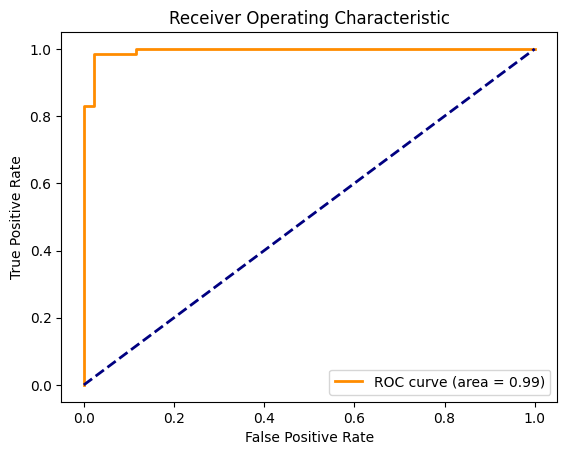

In [15]:
# Plot the ROC curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

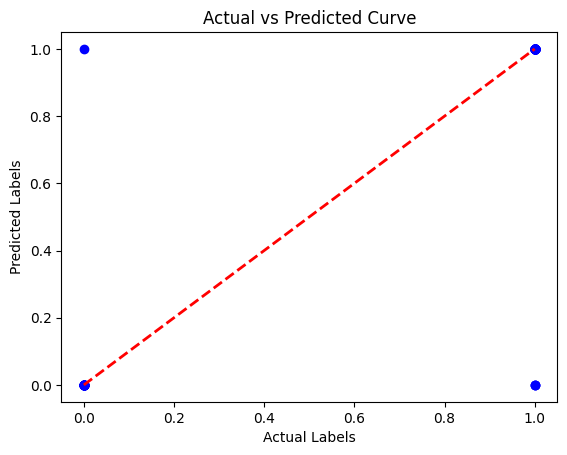

In [16]:
# Plot the actual vs predicted curve
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Actual vs Predicted Curve')
plt.show()